# Misc dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
graph = Graph_MCMC()
graph.read_from_ns("sp_primary_school/day_2") # escorts could be fun

In [4]:
graph.remove_property("viz")
graph.remove_property("label")

True

In [5]:
graph.G.vertex_properties

{'_graphml_vertex_id': <VertexPropertyMap object with value type 'int16_t', for Graph 0x7f90a8591100, at 0x7f903a782850>, 'classname': <VertexPropertyMap object with value type 'string', for Graph 0x7f90a8591100, at 0x7f903a717c10>, 'gender': <VertexPropertyMap object with value type 'string', for Graph 0x7f90a8591100, at 0x7f903a717cd0>, '_pos': <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f90a8591100, at 0x7f903a717e20>}

In [6]:
graph.convert_props_to_flags()
graph.remove_property("Unknown")

True

In [7]:
graph.print_info()

Graph with N=238 nodes, E=5539 edges and D=13 vertex features for training


In [8]:
graph.list_props()

name                   (graph)   (type: string, val: sp_primary_school (day_2))
description            (graph)   (type: string, val: Two temporal networks of
                                                     contacts among students
                                                     and teachers at a primary
                                                     school in Lyon, France, on
                                                     consecutive days of in
                                                     October 2009. Each network
                                                     accumulates all contacts
                                                     over the course of a
                                                     single day; contacts were
                                                     sampled at 20-second
                                                     intervals)
citation               (graph)   (type: string, val: ['Juliette Stehle et al.,
  

In [9]:
graph.partition(B_min=18, B_max=18)

Performing inference...
Current bracket: (18, 18, 18) (10249.00173417677, 10249.00173417677, 10249.00173417677)
Current bracket: (18, 18, 18) (10249.00173417677, 10249.00173417677, 10249.00173417677)
Bisect at B = 18 with S = 10249.00173417677
Best result: B = 18, S = 10249.00173417677
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f90a8591100, at 0x7f9037fc4df0>

In [10]:
graph.mcmc(num_iter=10000)

100%|██████████| 10000/10000 [00:11<00:00, 862.31it/s]


18

Drawing soft partition


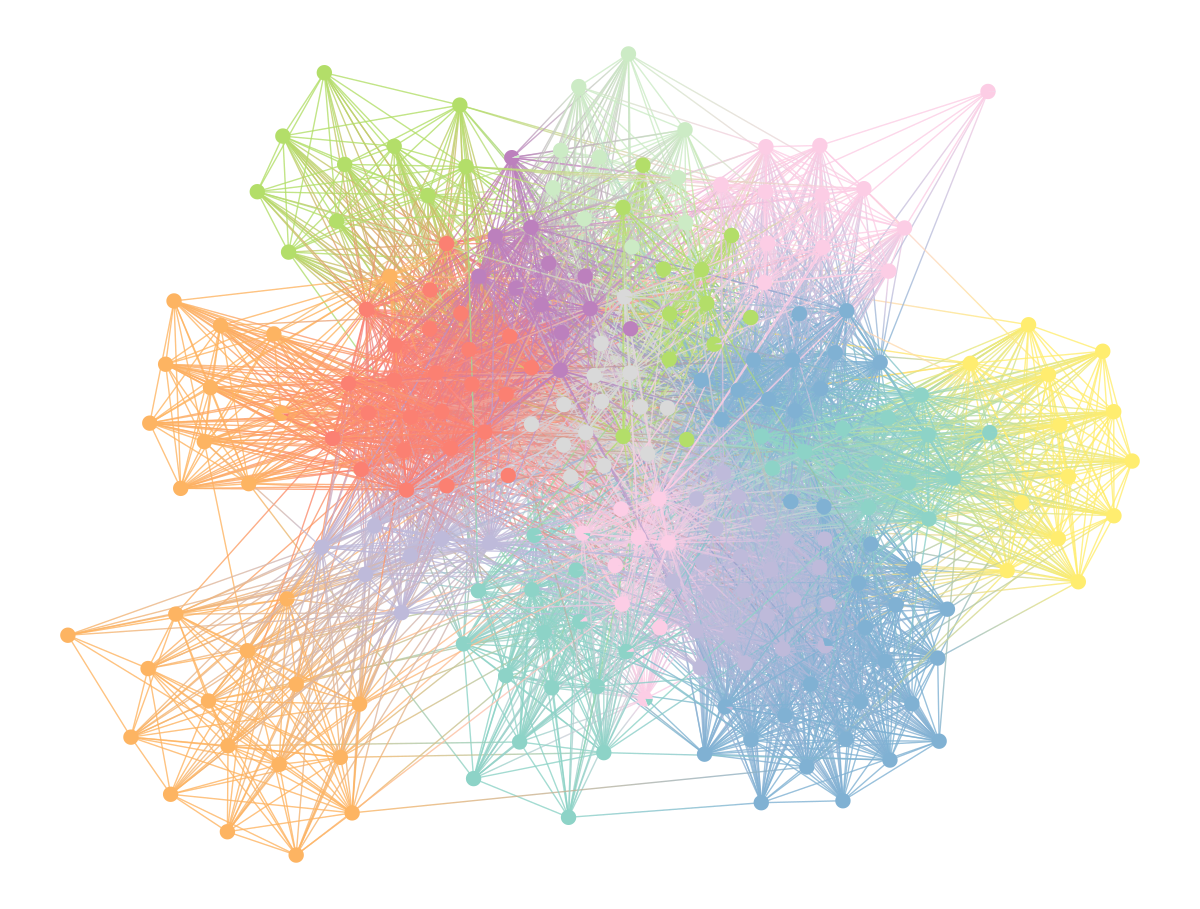

In [11]:
#graph.draw(gen_layout=False, output="school-graph.png")
graph.draw(gen_layout=False, size=7)

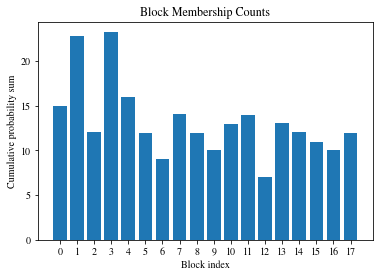

In [12]:
graph.plot_posterior_props()

## Train classifier

In [13]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:10<00:00, 982.71it/s]Sample accept ratio: 82.3%
Train. set accuracy: 55.46218487394958%



## Interpret results

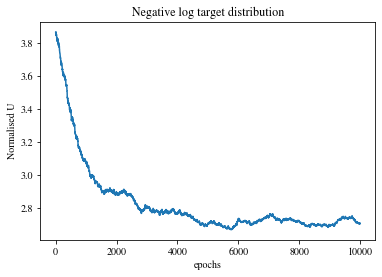

2.828405079212166

In [14]:
classifier.plot_U()

In [15]:
classifier.thin_samples(burn_in_pc=30, thinning_pc=10)

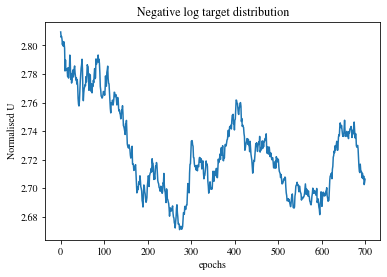

2.725997825096841


In [16]:
u_mean = classifier.plot_U()
print(u_mean)

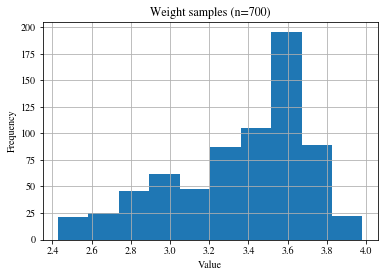

In [17]:
classifier.plot_sample_histogram()

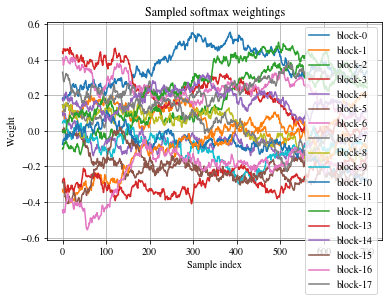

In [18]:
classifier.plot_sample_history()

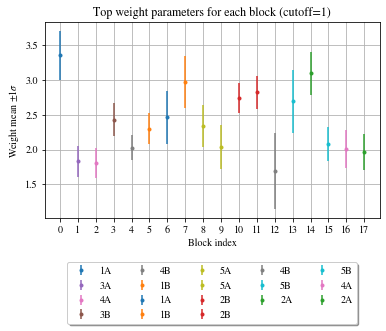

In [19]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

Discarding feature 10: Teachers
Discarding feature 11: F
Discarding feature 12: M
Discarding feature 13: bias


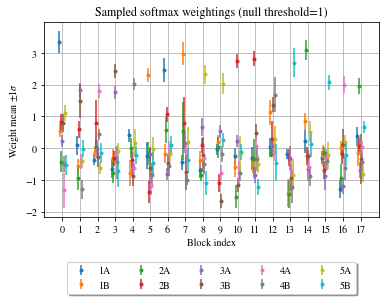

In [20]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=1, legend=True)